In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

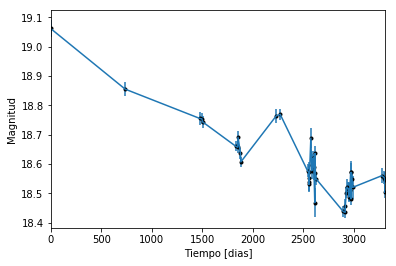

In [2]:
data = np.genfromtxt('LC_2670_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

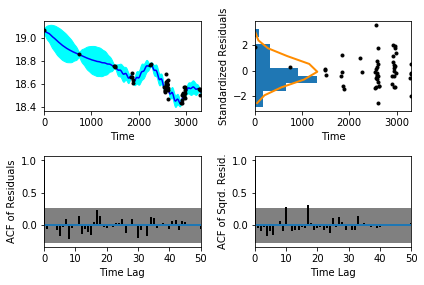

In [5]:
sample.assess_fit()

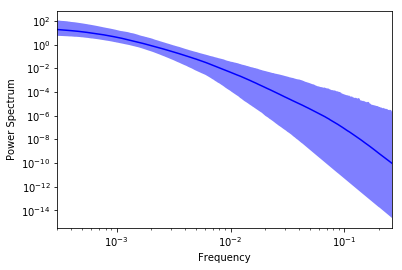

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000377525,0.0565456,'Medida del nivel de ruido')

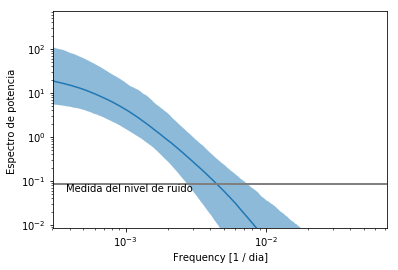

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

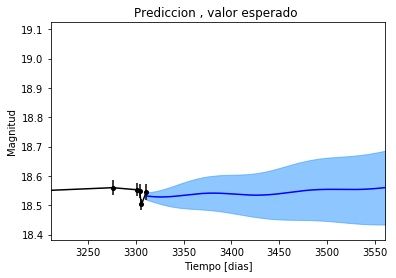

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

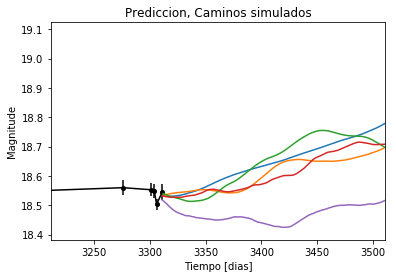

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


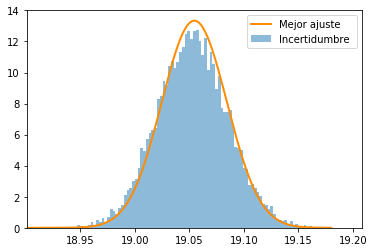

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

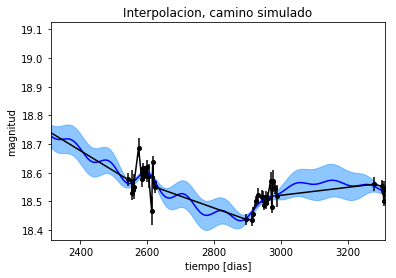

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

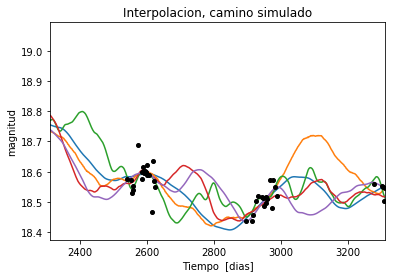

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


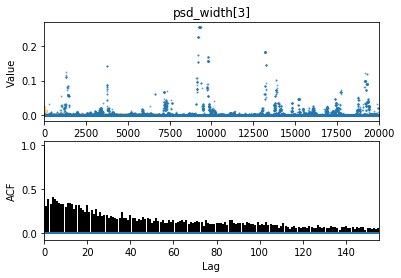

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1022.5278348
Median: 0.0117787272091
Standard deviation: 0.0959796387323
68% credibility interval: [ 0.00108391  0.10476098]
95% credibility interval: [  3.70308546e-04   3.75578865e-01]
99% credibility interval: [  3.12382158e-04   4.86972439e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 752.798157877
Median: 0.00170982706014
Standard deviation: 0.0399233607066
68% credibility interval: [ 0.00043131  0.01568624]
95% credibility interval: [ 0.00031528  0.11510223]
99% credibility interval: [ 0.00030396  0.29745688]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 504.416240112
Median: 0.0110541187945
Standard deviation:

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 647.697676664
Median: 0.00566709747525
Standard deviation: 0.123192694215
68% credibility interval: [ 0.          0.18806949]
95% credibility interval: [ 0.          0.43386279]
99% credibility interval: [ 0.          0.49878894]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 647.697676664
Median: 0.00566709747525
Standard deviation: 0.123192694215
68% credibility interval: [ 0.          0.18806949]
95% credibility interval: [ 0.          0.43386279]
99% credibility interval: [ 0.          0.49878894]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1685.38460718
Median: 0.0
Standard deviation: 0.00025376481228
68% c

Plotting parameter summary


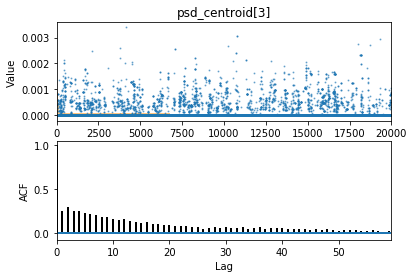

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 980.161897073
Median: 106.092217615
Standard deviation: 1.78934023697
68% credibility interval: [ 104.07959     107.51654508]
95% credibility interval: [ 101.55082911  108.37467945]
99% credibility interval: [  99.42643863  108.74368124]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 702.532220696
Median: 0.411784390134
Standard deviation: 1.13807569206
68% credibility interval: [ 0.04417174  2.13148108]
95% credibility interval: [ 0.01592295  3.87084847]
99% credibility interval: [ 0.01105228  5.03872142]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 712.987037047
Median: 0.240217125942
Standard deviation: 2.15202144912
68% credibility interval: [ 0.01802617  2.4241723 ]
95% credibility interval: [  1.98759775e-0

Plotting parameter summary


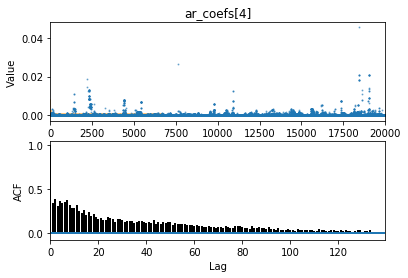

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20049.4150936
Median: 5.75916074762e-26
Standard deviation: 4.93680061918e+36
68% credibility interval: [  3.46573430e-55   1.28224215e-06]
95% credibility interval: [  2.44819324e-80   8.23005316e+01]
99% credibility interval: [  3.01039793e-89   3.12963732e+07]


In [28]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1508.59848453
Median: 18.7277636658
Standard deviation: 0.106754415625
68% credibility interval: [ 18.64007705  18.82091907]
95% credibility interval: [ 18.52098497  18.95122234]
99% credibility interval: [ 18.40475895  19.10116802]


Plotting parameter summary


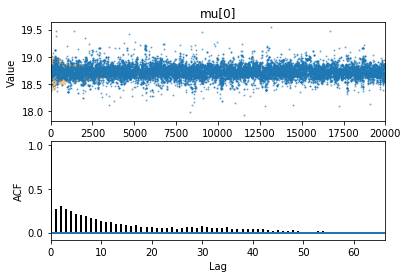

In [30]:
sample.plot_parameter('mu', 0, doShow=True)

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [32]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 647.697676664
Median: 0.00566709747525
Standard deviation: 0.123192694215
68% credibility interval: [ 0.          0.18806949]
95% credibility interval: [ 0.          0.43386279]
99% credibility interval: [ 0.          0.49878894]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 647.697676664
Median: 0.00566709747525
Standard deviation: 0.123192694215
68% credibility interval: [ 0.          0.18806949]
95% credibility interval: [ 0.          0.43386279]
99% credibility interval: [ 0.          0.49878894]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1685.38460718
Median: 0.0
Standard deviation: 0.00025376481228
68% c

Plotting parameter summary


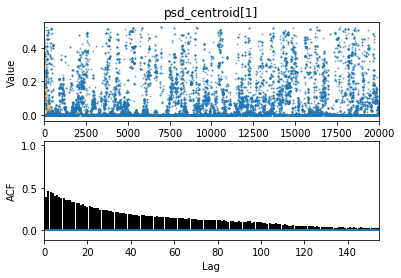

In [33]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [34]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [35]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 980.161897073
Median: 106.092217615
Standard deviation: 1.78934023697
68% credibility interval: [ 104.07959     107.51654508]
95% credibility interval: [ 101.55082911  108.37467945]
99% credibility interval: [  99.42643863  108.74368124]


Plotting parameter summary


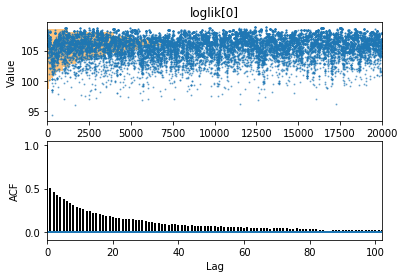

In [36]:
sample.plot_parameter('loglik', 0, doShow=True)

In [37]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [38]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1250.77731481
Median: 0.0359107940642
Standard deviation: 0.0455382861192
68% credibility interval: [ 0.02111684  0.06954225]
95% credibility interval: [ 0.01370459  0.16164201]
99% credibility interval: [ 0.01055459  0.28847284]


Plotting parameter summary


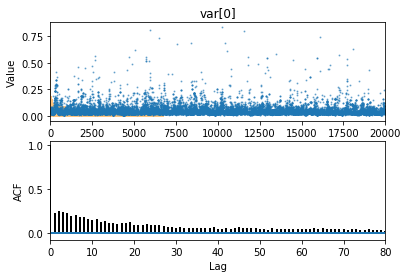

In [39]:
sample.plot_parameter('var', 0, doShow=True)

In [40]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [41]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1124.3063346
Median: 1.19585864705
Standard deviation: 0.196453056999
68% credibility interval: [ 1.01491352  1.39787729]
95% credibility interval: [ 0.87587589  1.64950894]
99% credibility interval: [ 0.79196723  1.81269178]


Plotting parameter summary


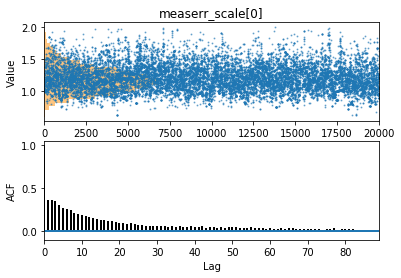

In [42]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [43]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [44]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 614.841053228
Median: 6.49725796337e-05
Standard deviation: 0.00370712562636
68% credibility interval: [  3.30399859e-06   1.02901932e-03]
95% credibility interval: [  1.38248396e-07   7.87504328e-03]
99% credibility interval: [  9.34720105e-13   2.35386643e-02]


Plotting parameter summary


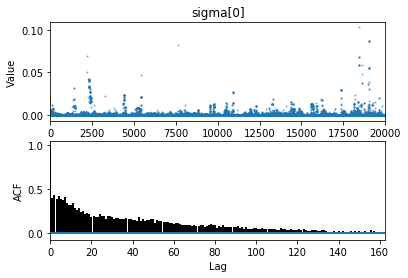

In [45]:
sample.plot_parameter('sigma', 0, doShow=True)

In [46]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [47]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1022.5278348
Median: (-0.0740079257374+0j)
Standard deviation: 0.981234227879
68% credibility interval: [-0.65823263-0.41713084j -0.00681038-1.42938911j]
95% credibility interval: [ -2.35983161e+00+0.j          -2.32671722e-03-0.45101932j]
99% credibility interval: [ -3.05973807e+00-1.47412577j  -1.96275499e-03-2.0066433j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 752.798157877
Median: (-0.0107431602621+0j)
Standard deviation: 0.813674065359
68% credibility interval: [-0.09855954+0.11111172j -0.00270999+0.j        ]
95% credibility interval: [-0.72320865+0.80526051j -0.00198097+0.j        ]
99% credibility interval: [-1.86897669+1.22706353j -0.00190986+2.53426204j]
Posterior summary for parameter ar_roots  eleme